In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import RidgeCV,LassoCV,ElasticNetCV
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
from mlxtend.feature_selection import SequentialFeatureSelector
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df1=pd.read_csv('gapminder.csv')

In [3]:
df1.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059,2.73,0.1,3.328945,24.59620,12314,129.9049,75.3,29.5,Middle East & North Africa
1,19842251,6.43,2.0,1.474353,22.25083,7103,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860,2.24,0.5,4.785170,27.50170,14646,118.8915,75.5,15.4,America
3,2975029,1.40,0.1,1.804106,25.35542,7383,132.8108,72.5,20.0,Europe & Central Asia
4,21370348,1.96,0.1,18.016313,27.56373,41312,117.3755,81.5,5.2,East Asia & Pacific


In [4]:
df1.shape

(139, 10)

In [5]:
df1.describe()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
count,1.390000e+02,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,3.549977e+07,3.005108,1.915612,4.459874,24.623054,16638.784173,126.701914,69.602878,45.097122
std,1.095121e+08,1.615354,4.408974,6.268349,2.209368,19207.299083,4.471997,9.122189,45.724667
min,2.773150e+05,1.280000,0.060000,0.008618,20.397420,588.000000,117.375500,45.200000,2.700000
25%,3.752776e+06,1.810000,0.100000,0.496190,22.448135,2899.000000,123.232200,62.200000,8.100000
50%,9.705130e+06,2.410000,0.400000,2.223796,25.156990,9938.000000,126.519600,72.000000,24.000000
75%,2.791973e+07,4.095000,1.300000,6.589156,26.497575,23278.500000,130.275900,76.850000,74.200000
max,1.197070e+09,7.590000,25.900000,48.702062,28.456980,126076.000000,135.492000,82.600000,192.000000


In [6]:
df1.isnull().sum()

population         0
fertility          0
HIV                0
CO2                0
BMI_male           0
GDP                0
BMI_female         0
life               0
child_mortality    0
Region             0
dtype: int64

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
population         139 non-null int64
fertility          139 non-null float64
HIV                139 non-null float64
CO2                139 non-null float64
BMI_male           139 non-null float64
GDP                139 non-null int64
BMI_female         139 non-null float64
life               139 non-null float64
child_mortality    139 non-null float64
Region             139 non-null object
dtypes: float64(7), int64(2), object(1)
memory usage: 11.0+ KB


In [8]:
df1['population'].nunique()

139

In [9]:
df1=df1.drop('population',axis=1)

In [10]:
df1.head()

,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,2.73,0.1,3.328945,24.59620,12314,129.9049,75.3,29.5,Middle East & North Africa
1,6.43,2.0,1.474353,22.25083,7103,130.1247,58.3,192.0,Sub-Saharan Africa
2,2.24,0.5,4.785170,27.50170,14646,118.8915,75.5,15.4,America
3,1.40,0.1,1.804106,25.35542,7383,132.8108,72.5,20.0,Europe & Central Asia
4,1.96,0.1,18.016313,27.56373,41312,117.3755,81.5,5.2,East Asia & Pacific


In [11]:
df1.nunique()

fertility          116
HIV                 45
CO2                139
BMI_male           139
GDP                139
BMI_female         139
life               109
child_mortality    131
Region               6
dtype: int64

In [12]:
for i in df1.iloc[:,0:-1]:
    print(df1[i].skew())

0.9673942369047374
3.9185261094083095
3.6285963285060667
-0.2551056643902182
2.3586616852353073
-0.08024995256794422
-0.5483816510869028
1.15639965861021


In [13]:
df1['Region'].value_counts()

Europe & Central Asia         41
Sub-Saharan Africa            40
America                       27
East Asia & Pacific           14
Middle East & North Africa    10
South Asia                     7
Name: Region, dtype: int64

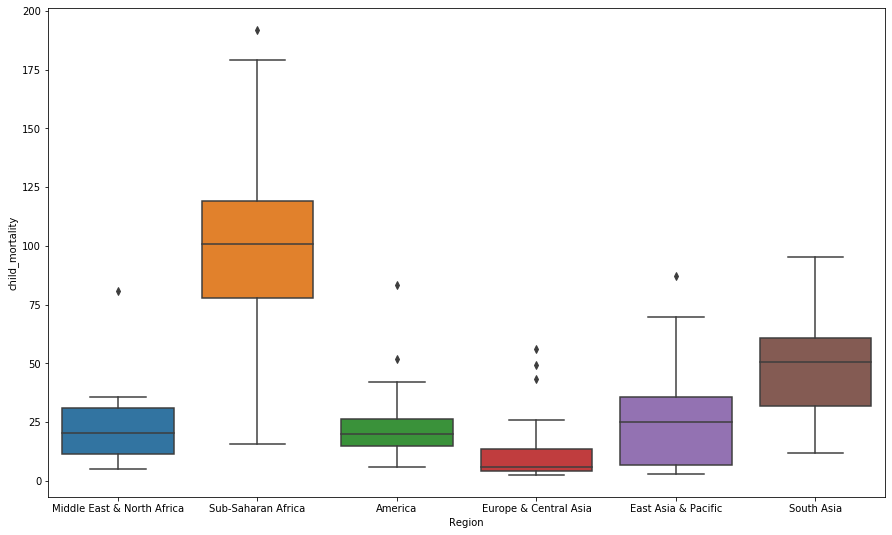

In [14]:
plt.figure(figsize=(15,9))
sns.boxplot(df1['Region'],df1['child_mortality'])

In [15]:
#do label encoding as per the median 
df1['Region'].replace({'Europe & Central Asia':0,
                      'America':1,
                      'Middle East & North Africa':2,
                      'East Asia & Pacific':3,
                      'South Asia':4,
                      'Sub-Saharan Africa':5},inplace=True)

In [16]:
df1.head()

,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,2.73,0.1,3.328945,24.59620,12314,129.9049,75.3,29.5,2
1,6.43,2.0,1.474353,22.25083,7103,130.1247,58.3,192.0,5
2,2.24,0.5,4.785170,27.50170,14646,118.8915,75.5,15.4,1
3,1.40,0.1,1.804106,25.35542,7383,132.8108,72.5,20.0,0
4,1.96,0.1,18.016313,27.56373,41312,117.3755,81.5,5.2,3


In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 9 columns):
fertility          139 non-null float64
HIV                139 non-null float64
CO2                139 non-null float64
BMI_male           139 non-null float64
GDP                139 non-null int64
BMI_female         139 non-null float64
life               139 non-null float64
child_mortality    139 non-null float64
Region             139 non-null int64
dtypes: float64(7), int64(2)
memory usage: 9.9 KB


In [18]:
# Target column in this problem will be child_mortality
X=df1.drop('child_mortality',axis=1)
y=df1['child_mortality']


In [19]:
X.head()

,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,Region
0,2.73,0.1,3.328945,24.59620,12314,129.9049,75.3,2
1,6.43,2.0,1.474353,22.25083,7103,130.1247,58.3,5
2,2.24,0.5,4.785170,27.50170,14646,118.8915,75.5,1
3,1.40,0.1,1.804106,25.35542,7383,132.8108,72.5,0
4,1.96,0.1,18.016313,27.56373,41312,117.3755,81.5,3


In [20]:
for i in X:
    print('Skewness for',i,X[i].skew())

Skewness for fertility 0.9673942369047374
Skewness for HIV 3.9185261094083095
Skewness for CO2 3.6285963285060667
Skewness for BMI_male -0.2551056643902182
Skewness for GDP 2.3586616852353073
Skewness for BMI_female -0.08024995256794422
Skewness for life -0.5483816510869028
Skewness for Region 0.25632251942208867


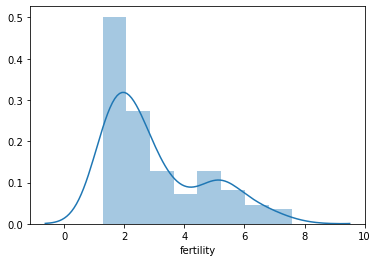

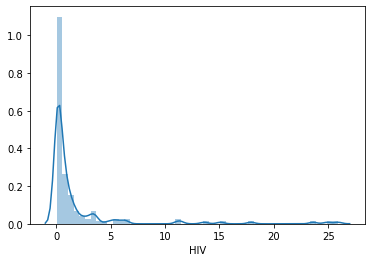

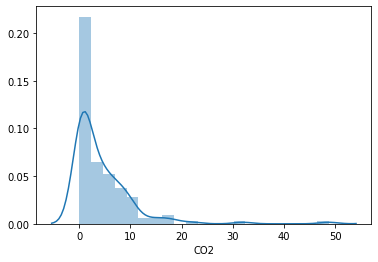

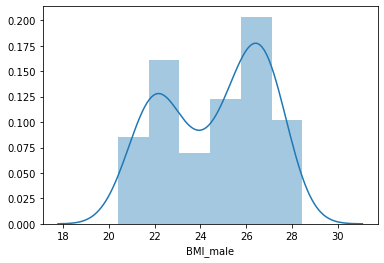

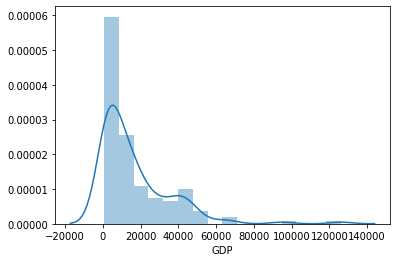

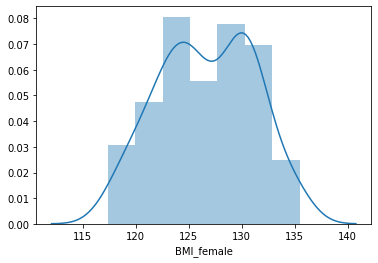

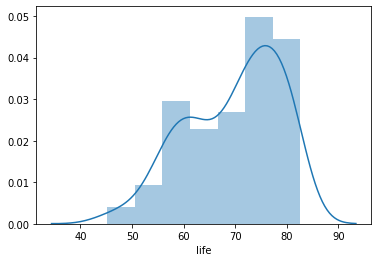

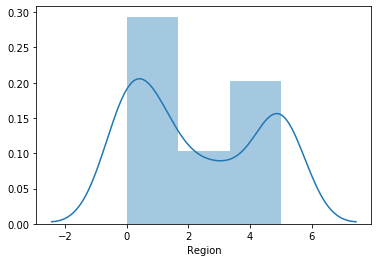

In [21]:
for i in X:
    sns.distplot(X[i])
    plt.show()

In [22]:
for i in X.iloc[:,0:-1]:
    if(X[i].skew()>=1):
        X[i]=np.log2(X[i])
    

In [23]:
for i in X.iloc[:,0:-1]:
    print('Skewness for',i,X[i].skew())

Skewness for fertility 0.9673942369047374
Skewness for HIV 0.5768704902985403
Skewness for CO2 -0.5878945228571555
Skewness for BMI_male -0.2551056643902182
Skewness for GDP -0.21095955114835732
Skewness for BMI_female -0.08024995256794422
Skewness for life -0.5483816510869028


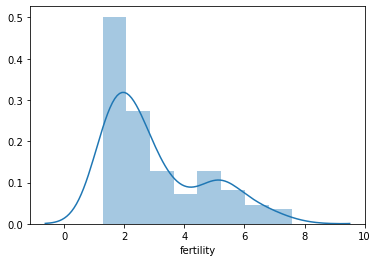

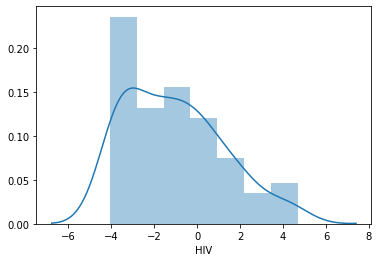

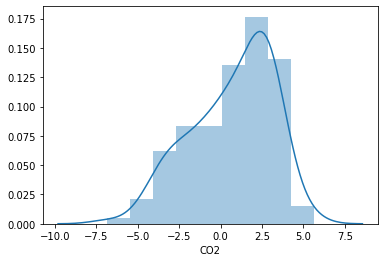

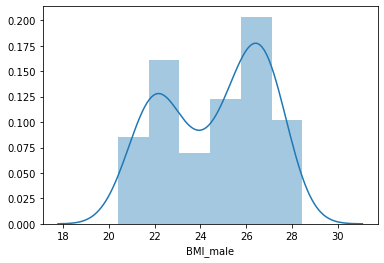

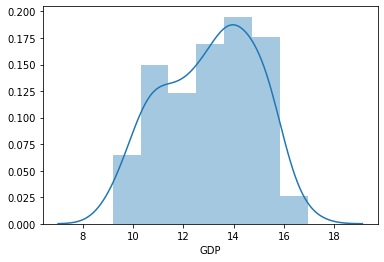

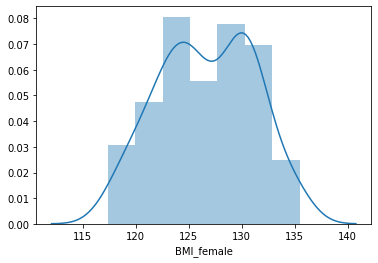

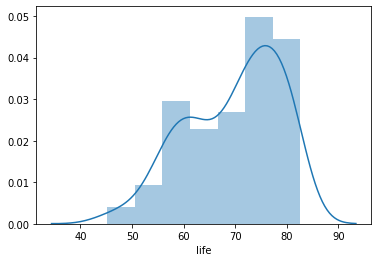

In [24]:
for i in X.iloc[:,0:-1]:
    sns.distplot(X[i])
    plt.show()

In [25]:
# Now fitting all the models without any selection 

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [27]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
lr.score(X_train,y_train)

0.8957036084236858

In [29]:
lr.score(X_test,y_test)

0.8552511756591751

In [30]:
# A condition of overfitting arises so we will do different regularisation techniques  

In [31]:
ri=RidgeCV(alphas=[9,10,11,10.5,10.8]) # So with different values of Ridge best comes to be 10.5 but no changes in result so we will do Lasso 
ri.fit(X_train,y_train)

RidgeCV(alphas=array([ 9. , 10. , 11. , 10.5, 10.8]), cv=None,
        fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
        store_cv_values=False)

In [32]:
ri.alpha_

10.5

In [33]:
ri.score(X_train,y_train)

0.894204540451947

In [34]:
ri.score(X_test,y_test)

0.8560023376362026

In [35]:
ls=LassoCV(alphas=[6,5,7,5.5,10])
ls.fit(X_train,y_train)

LassoCV(alphas=[6, 5, 7, 5.5, 10], copy_X=True, cv=None, eps=0.001,
        fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=None,
        normalize=False, positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [36]:
ls.alpha_

5.0

In [37]:
ls.score(X_train,y_train)

0.880341015136646

In [38]:
ls.score(X_test,y_test)

0.8442549175338694

In [39]:
el=ElasticNetCV(alphas=[0.1,0.3,0.09,0.21,0.31]) #Regularisation did not change anything 
el.fit(X_train,y_train)

ElasticNetCV(alphas=[0.1, 0.3, 0.09, 0.21, 0.31], copy_X=True, cv=None,
             eps=0.001, fit_intercept=True, l1_ratio=0.5, max_iter=1000,
             n_alphas=100, n_jobs=None, normalize=False, positive=False,
             precompute='auto', random_state=None, selection='cyclic',
             tol=0.0001, verbose=0)

In [40]:
el.alpha_

0.3

In [41]:
el.score(X_train,y_train)

0.8919734440892263

In [42]:
el.score(X_test,y_test)

0.8560839189821325

In [43]:
#Now for a distance based algo scaling is compalsary so we will do Standard scaller

In [44]:
ss=StandardScaler()
X_trains=ss.fit_transform(X_train)
X_tests=ss.transform(X_test)

In [45]:
knn=KNeighborsRegressor()
knn.fit(X_trains,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [46]:
knn.score(X_trains,y_train)

0.9027042461529114

In [47]:
knn.score(X_tests,y_test)

0.8063266489914533

In [48]:
# do Hyperperamteric tuning using gridsearchcv as our dataset is too small

In [49]:
params={'n_neighbors':np.arange(0,20),
   'p':np.arange(0,5),
   'weights':['distance','uniform']}
         

In [50]:
rr=GridSearchCV(estimator=knn,param_grid=params,cv=5,scoring='neg_mean_squared_error')
rr.fit(X_trains,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19]),
                         'p': array([0, 1, 2, 3, 4]),
                         'weights': ['distance', 'uniform']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [51]:
knnp=KNeighborsRegressor(**rr.best_params_)
knnp.fit(X_trains,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=1,
                    weights='uniform')

In [52]:
knnp.score(X_trains,y_train)

0.9217141553458601

In [53]:
knnp.score(X_tests,y_test)

0.7828099755155281

In [54]:
# now as we are not able to acheive our results what we want to we will now 
#try different feature selection methods and apply the same algos

In [55]:
dff=pd.concat([X,y],axis=1)

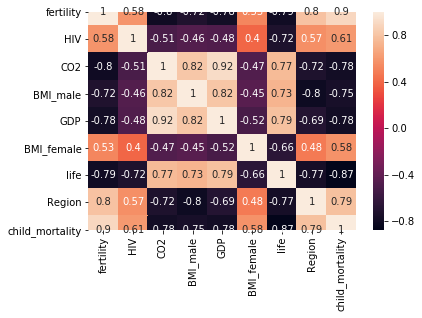

In [56]:
sns.heatmap(dff.corr(),annot=True)

In [57]:
dff.corr()

,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,Region,child_mortality
fertility,1.000000,0.582961,-0.798836,-0.715380,-0.777365,0.527314,-0.786921,0.795410,0.901704
HIV,0.582961,1.000000,-0.508603,-0.464747,-0.481495,0.396088,-0.724148,0.566911,0.608344
CO2,-0.798836,-0.508603,1.000000,0.820008,0.919619,-0.473128,0.765660,-0.721594,-0.782187
BMI_male,-0.715380,-0.464747,0.820008,1.000000,0.815811,-0.447049,0.731559,-0.802873,-0.749691
GDP,-0.777365,-0.481495,0.919619,0.815811,1.000000,-0.515786,0.793094,-0.693826,-0.779921
BMI_female,0.527314,0.396088,-0.473128,-0.447049,-0.515786,1.000000,-0.658718,0.479073,0.582053
life,-0.786921,-0.724148,0.765660,0.731559,0.793094,-0.658718,1.000000,-0.766512,-0.874106
Region,0.795410,0.566911,-0.721594,-0.802873,-0.693826,0.479073,-0.766512,1.000000,0.793570
child_mortality,0.901704,0.608344,-0.782187,-0.749691,-0.779921,0.582053,-0.874106,0.793570,1.000000


In [58]:
abs(dff.corr()['child_mortality'])[abs(dff.corr()['child_mortality'])>0.5]

fertility          0.901704
HIV                0.608344
CO2                0.782187
BMI_male           0.749691
GDP                0.779921
BMI_female         0.582053
life               0.874106
Region             0.793570
child_mortality    1.000000
Name: child_mortality, dtype: float64

In [59]:
dff[['fertility','HIV']].corr()

,fertility,HIV
fertility,1.000000,0.582961
HIV,0.582961,1.000000


In [60]:
dff[['CO2','HIV']].corr()

,CO2,HIV
CO2,1.000000,-0.508603
HIV,-0.508603,1.000000


In [61]:
dff[['CO2','BMI_male']].corr()# drop BMI_MALE

,CO2,BMI_male
CO2,1.000000,0.820008
BMI_male,0.820008,1.000000


In [62]:
dff[['CO2','GDP']].corr() # DROP GDP

,CO2,GDP
CO2,1.000000,0.919619
GDP,0.919619,1.000000


In [63]:
dff[['CO2','BMI_female']].corr()

,CO2,BMI_female
CO2,1.000000,-0.473128
BMI_female,-0.473128,1.000000


In [64]:
dff[['life','BMI_female']].corr() # drop BMI FEMALE 

,life,BMI_female
life,1.000000,-0.658718
BMI_female,-0.658718,1.000000


In [65]:
dff['Region'].value_counts()

0    41
5    40
1    27
3    14
2    10
4     7
Name: Region, dtype: int64

In [66]:
from scipy.stats import f_oneway

In [67]:
f_oneway(dff[dff['Region']==0][['child_mortality']], 
        dff[dff['Region']==1][['child_mortality']],
        dff[dff['Region']==2][['child_mortality']],
        dff[dff['Region']==3][['child_mortality']],
        dff[dff['Region']==4][['child_mortality']],
        dff[dff['Region']==5][['child_mortality']])

F_onewayResult(statistic=array([67.64635464]), pvalue=array([7.52514539e-35]))

In [68]:
f_oneway(dff[dff['Region']==0][['life']],# high correlation between independent 
        dff[dff['Region']==1][['life']],
        dff[dff['Region']==2][['life']],
        dff[dff['Region']==3][['life']],
        dff[dff['Region']==4][['life']],
        dff[dff['Region']==5][['life']])

F_onewayResult(statistic=array([53.35831528]), pvalue=array([3.78640579e-30]))

In [69]:
X_new=dff.drop(['BMI_male','GDP','BMI_female'],axis=1)

In [70]:
Xn_train,Xn_test,y_train,y_test=train_test_split(X_new,y,test_size=0.2,random_state=0)

In [71]:
lr1=LinearRegression()
lr1.fit(Xn_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [72]:
lr1.score(Xn_train,y_train) # Here we are getting 100% accuracy in both hence this is the maximum score which can be acheived 

1.0

In [73]:
lr1.score(Xn_test,y_test)

1.0

In [ ]:
# Even after getting the maximum score in both train and test that is 100%
#we will see other methods also which can be helpful in feature selection

In [74]:
ss=StandardScaler()
X_trainsn=ss.fit_transform(Xn_train)
X_testsn=ss.transform(Xn_test)



In [75]:
knn=KNeighborsRegressor()
knn.fit(X_trainsn,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [76]:
knn.score(X_trainsn,y_train)

0.9591966088964613

In [77]:
knn.score(X_testsn,y_test)

0.9386711048465018

In [78]:
# do Hyperperamteric tuning using gridsearchcv as our dataset is too small

params={'n_neighbors':np.arange(2,20),
   'p':np.arange(0,7),
   'weights':['distance','uniform']}

In [79]:
gr=GridSearchCV(estimator=knn,param_grid=params,cv=5,scoring='r2')
gr.fit(X_trainsn,y_train)



GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'p': array([0, 1, 2, 3, 4, 5, 6]),
                         'weights': ['distance', 'uniform']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [80]:
knnn=KNeighborsRegressor(**gr.best_params_)
knnn.fit(X_trainsn,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=1,
                    weights='distance')

In [81]:
knnn.score(X_trainsn,y_train)

1.0

In [82]:
knnn.score(X_testsn,y_test)

0.9273170918326278

In [83]:
# Using wrapper methods as well

In [84]:
#1. Backword selection 

In [85]:
cols=list(X.columns)
pmax=1
while(len(cols)>0):
    p=[]
    x_1=X[cols]
    x_1=sm.add_constant(x_1)
    model=sm.OLS(y,x_1).fit()
    p=pd.Series(model.pvalues.values[1:],index=cols)
    pmax=max(p)
    features_with_pmax=p.idxmax()
    if(pmax>0.05):
        cols.remove(features_with_pmax)
    else:
        break;
selected_features_be=cols
print(selected_features_be)

['fertility', 'life']


In [86]:
x_back=X[['fertility','life']]

In [87]:
x_train,x_test,y_train,y_test=train_test_split(x_back,y,test_size=0.2,random_state=0)

In [88]:
lr_back=LinearRegression()
lr_back.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [89]:
lr_back.score(x_train,y_train)

0.8883753087351335

In [90]:
lr_back.score(x_test,y_test)

0.8582247554476862

In [91]:
ss=StandardScaler()
X_trains_back=ss.fit_transform(x_train)
X_tests_back=ss.transform(x_test)

In [92]:
knn=KNeighborsRegressor()
knn.fit(X_trains_back,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [93]:
knn.score(X_trains_back,y_train)

0.9184773845975749

In [94]:
knn.score(X_tests_back,y_test)

0.8480548181721861

In [95]:
params={'n_neighbors':np.arange(2,20),
   'p':np.arange(0,7),
   'weights':['distance','uniform']}

In [96]:
gr=GridSearchCV(estimator=knn,param_grid=params,cv=5,scoring='r2')
gr.fit(X_trains_back,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'p': array([0, 1, 2, 3, 4, 5, 6]),
                         'weights': ['distance', 'uniform']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [97]:
knnn=KNeighborsRegressor(**gr.best_params_)
knnn.fit(X_trains_back,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=9, p=6,
                    weights='uniform')

In [98]:
knnn.score(X_trains_back,y_train)

0.9072224669136759

In [99]:
knnn.score(X_tests_back,y_test)

0.8345811918049676

In [100]:
#RFE
from sklearn.feature_selection import RFE

In [101]:
nof_list=np.arange(1,8)
high_score=0
nof=0
score_list=[]
for n in range(len(nof_list)):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
    model=LinearRegression()
    rfe=RFE(model,nof_list[n])
    x_train_rfe=rfe.fit_transform(x_train,y_train)
    x_test_rfe=rfe.transform(x_test)
    model.fit(x_train_rfe,y_train)
    score=model.score(x_test_rfe,y_test)
    score_list.append(score)
    if score>high_score:
        high_score=score
        nof=nof_list[n]
print('optimum number of features: %d' %nof)
print('score with %d features: %f' %(nof,high_score))

optimum number of features: 5
score with 5 features: 0.858076


In [102]:
cols=list(X.columns)
model=LinearRegression()
rfe=RFE(model,5)
x_rfe=rfe.fit_transform(X,y)
model.fit(x_rfe,y)
temp=pd.Series(rfe.support_,index=cols)
selected_features_rfe=temp[temp==True].index
print(selected_features_rfe)

Index(['fertility', 'HIV', 'BMI_male', 'GDP', 'life'], dtype='object')


In [103]:
Xnew=X[['fertility', 'HIV', 'BMI_male', 'GDP', 'life']]

In [104]:
x_train,x_test,y_train,y_test=train_test_split(Xnew,y,test_size=0.2,random_state=0)

In [105]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [106]:
lr.score(x_train,y_train)

0.8951331852274612

In [107]:
lr.score(x_test,y_test)

0.8580760851321856

In [108]:
ss=StandardScaler()
X_trains=ss.fit_transform(x_train)
X_tests=ss.transform(x_test)

In [109]:
knn=KNeighborsRegressor()
knn.fit(X_trains,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [110]:
knn.score(X_trains,y_train)

0.9250612430651668

In [111]:
knn.score(X_tests,y_test)

0.8430388174454987

In [112]:
params={'n_neighbors':np.arange(2,20),
   'p':np.arange(0,7),
   'weights':['distance','uniform']}

gr=GridSearchCV(estimator=knn,param_grid=params,cv=5,scoring='r2')
gr.fit(X_trains,y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'p': array([0, 1, 2, 3, 4, 5, 6]),
                         'weights': ['distance', 'uniform']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [113]:
knnn=KNeighborsRegressor(**gr.best_params_)
knnn.fit(X_trains,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                    weights='distance')

In [114]:
knnn.score(X_trains,y_train)


1.0

In [115]:
knnn.score(X_tests,y_test)

0.8234790025225764